In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sacpy as scp

In [2]:
sst = scp.load_sst()['sst']
ssta = scp.get_anom(sst, method=2)

TypeError: expected 1D or 2D array for y

In [6]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

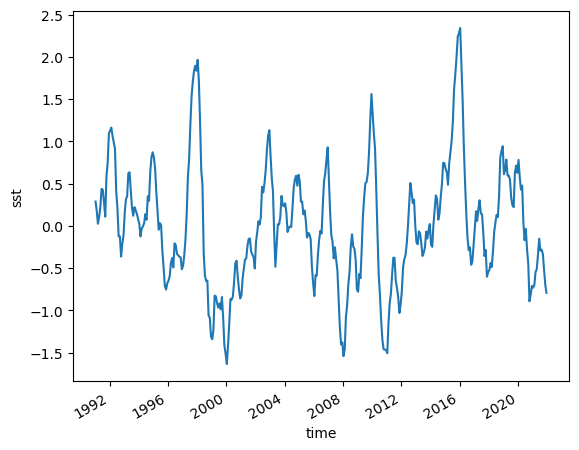

In [7]:
Nino34.plot()

In [4]:
linreg = scp.LinReg(Nino34,ssta)

/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/assengu/.miniconda/envs/phd_env/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarnin

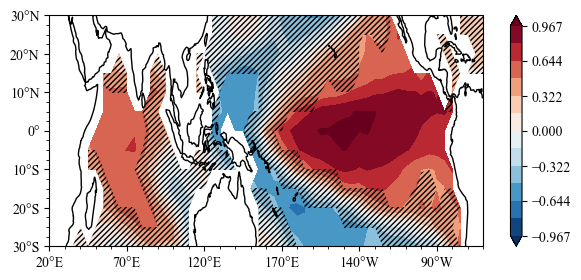

In [13]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
# linreg.mask()
m = ax.scontourf(lon,lat,linreg.corr)
n = ax.sig_plot(lon,lat,linreg.p_value, thrshd=0.00000000000000000001, color="k", mark_sig=False, marker="//////")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)
# plt.savefig("../pic/nino34.png",dpi=200)